# Artificial Neural Networks

In [13]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import math

In [14]:
df = pd.read_csv('dataset_NN.csv')
df

,att1,att2,att3,att4,att5,att6,class
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779,1
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822,1
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435,1
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281,1
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235,1
...,...,...,...,...,...,...,...
1995,1.0,1.0,1.0,157.498861,1.655794,5326.025889,10
1996,1.0,1.0,1.0,152.404861,1.620345,5243.267754,10
1997,1.0,1.0,1.0,134.672861,1.541987,3766.763222,10
1998,1.0,1.0,1.0,142.926861,1.426381,4118.327320,10


In [15]:
df['class'].value_counts()

10    200
9     200
8     200
7     200
6     200
5     200
4     200
3     200
2     200
1     200
Name: class, dtype: int64

In [16]:
X = df.values[:,:-1]
y = df.values[:, -1]

# preprocessing

In [17]:
def train_test_split(data,split,randomize=True):
    """
    Parameters:
        data: numpy array of the dataset
        split: percentage of the samples required for the training data
        randomize: boolean representing whether you want to randomize the dataset
    Returns:
        train_X: numpy array containing training data
        train_y: numpy array containing the training labels
        test_X: numpy array containing testing data
        test_y: numpy array containing the testing labels
    """
    
    split_index = int(split*len(data))
    
    # randomly shuffles rows of the dataset
    if randomize == True:
        np.random.shuffle(data)
    
    
    X = data[:,:-1]
    y = data[:,-1]
    
    train_X = X[:split_index]
    train_y = y[:split_index]
    
    test_X = X[split_index:]
    test_y = y[split_index:]
    
    return X,y,train_X,train_y,test_X,test_y

In [18]:
X,y,train_X,train_y,test_X,test_y = train_test_split(df.values,0.7)

In [19]:
print(X.shape)
print(y.shape)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(2000, 6)
(2000,)
(1400, 6)
(1400,)
(600, 6)
(600,)


In [8]:
def one_hot_encoder(train_X,X):
    
    concatenated = None
    
    for i in range(3):
        
        oh_feature = np.zeros((train_X.shape[0],np.unique(X[:,i]).shape[0]))
        
        
        for index, feature in enumerate(train_X[:,i]):
            oh_feature[index,int(feature - 1)] = 1
        
        if concatenated is not None:
            concatenated = np.concatenate((concatenated,oh_feature), axis=1)
        
        else:
            concatenated = oh_feature
        
    
    return concatenated

In [9]:
oh_inputs = one_hot_encoder(train_X,X)
oh_inputs.shape


(1400, 16)

In [10]:
def standardizer(X):
    
    X_continuous = X[:,3:6]
    
    X_mean = np.mean(X_continuous,axis=0)
    X_std = np.std(X_continuous, axis=0)
    
    return (X_continuous - X_mean)/X_std
        

In [11]:
cont_inputs = standardizer(train_X)

In [12]:
cont_inputs.shape

(1400, 3)

In [13]:
X_scaled = np.concatenate((oh_inputs,cont_inputs),axis=1)

In [14]:
X_scaled.shape

(1400, 19)

In [15]:
def one_hot(y):
    
    y_oh = np.zeros((10,y.shape[0]))
    
    for index,label in enumerate(y):
        y_oh[int(label) - 1,index] = 1
    
    return y_oh

In [16]:
def initialize(layer_dimensions):
    np.random.seed(2)
    
    params = {}
    
    for l in range(1,len(layer_dimensions)):
        params['W' + str(l)] = np.random.randn(layer_dimensions[l], layer_dimensions[l-1])*0.01
        
        params['b' + str(l)] = np.random.randn(layer_dimensions[l], 1)*0.01
    
    return params
    

In [17]:
def relu(Z):
    
    A = np.maximum(0,Z)
    
    cache = Z 
    return A, cache

def softmax(Z):
    # Z = (n_prev,m)
    
    #try max subtraction
    
    max_activations = np.max(Z,axis=0)
    
    
    
    return np.exp(Z-max_activations)/np.sum(np.exp(Z-max_activations),axis=0,keepdims=True),Z
#     return np.exp(Z)/np.sum(np.exp(Z),axis=0,keepdims=True),Z

def relu_derivative(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True)
    
    dZ[Z <= 0] = 0
    
    
    
    return dZ



In [18]:
def lin_forward(A,W,b):
    
    Z = np.dot(W,A) + b
    
    cache = (A,W,b)
    
    return Z, cache

In [19]:
def lin_activation(A_prev, W, b, activation_type):
    
    Z,linear_cache = linear_forward(A_prev, W, b)
    
    if activation_type == "softmax":
        A, activation_cache = softmax(Z)
    
    elif activation_type == "relu":
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [20]:
def NN_forward(X,parameters):
    
    caches = []
    A = X
    L = len(parameters) // 2
    
    for l in range(1,L+1):
        A_prev = A
        
        
        
#         print("multiplying weights of shape")
#         print(parameters["W"+str(l)].shape)
#         print("with activations of shape")
#         print(A_prev.shape)
#         print("and adding bias of shape")
#         print(parameters["b"+str(l)].shape)


        Z = np.dot(parameters["W"+str(l)],A_prev) + parameters["b"+str(l)]
    
        linear_cache = (A_prev, parameters["W"+str(l)], parameters["b"+str(l)])
        
        if l == L:
            
            A, activation_cache = softmax(Z)
        
        else:
            A, activation_cache = relu(Z)
    
        cache = (linear_cache, activation_cache)
        
        caches.append(cache)
    
    return A, caches

In [21]:
def NN_cost(yhats,y):
    
    m = y.shape[1]
    
    
    
    cost = -np.sum(np.log(np.maximum(yhats,1e-15))*y)/m
    
    
    
    return cost

In [22]:
def lin_backward(dZ, cache):
    
    A_prev,W,b = cache
    m = A_prev.shape[1]
    
    dW = np.dot(dZ, cache[0].T) / m
    db = np.squeeze(np.sum(dZ, axis=1, keepdims=True))/m
    dA_prev = np.dot(cache[1].T, dZ)
    
    return dA_prev, dW, db

In [23]:
def lin_activation_backward(dA,cache,activation_type):
    
    lin_cache, act_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
    
    dA_prev, dW, db = lin_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [24]:
def NN_backward(yhats,y,caches):
    
    grads = {}
    L = len(caches)
    
    m = yhats.shape[1]
    
    dZ = yhats - y
    
    cache = caches[L-1]

    linear_cache,activation_cache = cache
    A_prev, W, b = linear_cache
    
    
    
    grads["dW" + str(L)] = np.dot(dZ,A_prev.T)/m
    grads["db" + str(L)] = np.sum(dZ,axis=1,keepdims=True)/m
    grads["dA" + str(L-1)] = np.dot(W.T,dZ)
    
    for l in reversed(range(L-1)):
        linear_cache, activation_cache = caches[l]
        
        dZ = relu_derivative(grads["dA"+str(l+1)],activation_cache)
        
        A_prev,W,b = linear_cache
        
        m = A_prev.shape[1]
        
        dW = np.dot(dZ,A_prev.T)
        
        db = np.sum(dZ, axis=1, keepdims=True)/m
        dA_prev = np.dot(W.T, dZ)
        
        grads["dA"+str(l)] = dA_prev
        grads["dW" + str(l + 1)] = dW
        grads["db" + str(l + 1)] = db
        
    return grads

In [25]:
def update(parameters, grads, lr):
    
    L = len(parameters) // 2
    
    for l in range(L):
        
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - lr*grads["dW"+str(l+1)]
        
        
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - lr*grads["db"+str(l+1)]
        
    return parameters

In [26]:
def minibatch_generator(X,y,mini_batch_size):
    
    m = X.shape[1]
    mini_batches = []
    
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_y = y[:, permutation]
    
    num_complete_minibatches = math.floor(m/mini_batch_size)
    
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_y = shuffled_y[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:

        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size:]
        mini_batch_y = shuffled_y[:,num_complete_minibatches * mini_batch_size:]

        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [27]:
def model(X,y, layer_dims, learning_rate, epochs,mini_batch_size):
    
    parameters = initialize(layer_dims)
    
    costs = []
    
    for epoch in range(epochs):
        
        minibatches = minibatch_generator(X,y,mini_batch_size)
        
        predictions = None
        labels = None
        
        for minibatch in minibatches:
            
            mini_batch_X,mini_batch_y = minibatch
            
        
            yhats, caches = NN_forward(mini_batch_X,parameters)
        
#             predictions_categorical = np.argmax(yhats,axis=0)

#             true_categorical = np.argmax(mini_batch_y,axis=0)
    
            if predictions is None:
                predictions = yhats
            
            else:
                predictions = np.concatenate((predictions,yhats),axis=1)
                
            if labels is None:
                labels = mini_batch_y
            else:
                labels = np.concatenate((labels,mini_batch_y),axis=1)
        
            cost = NN_cost(yhats,mini_batch_y)

            grads = NN_backward(yhats,mini_batch_y,caches)
        
            parameters = update(parameters, grads, learning_rate)
        
            costs.append(cost)
            
            
        predictions_categorical = np.argmax(predictions,axis=0)

        true_categorical = np.argmax(labels,axis=0)
        
        
        
        if epoch % 1000 == 0:
            print("epoch: "+str(epoch))
            print("Training accuracy")
            print(np.sum((predictions_categorical == true_categorical))/y.shape[1])
            print("Cost: "+str(cost))
    
    return parameters
        

In [28]:
layer_dims = [19,18,8,10]
y_oh = one_hot(train_y)

In [29]:
parameters = model(X_scaled.T,y_oh,layer_dims,0.0001,50000,16)

epoch: 0
Training accuracy
0.10071428571428571
Cost: 2.302702282319983
epoch: 1000
Training accuracy
0.10285714285714286
Cost: 2.303654350879502
epoch: 2000
Training accuracy
0.10285714285714286
Cost: 2.299369954166128
epoch: 3000
Training accuracy
0.13428571428571429
Cost: 2.305711800976897
epoch: 4000
Training accuracy
0.21142857142857144
Cost: 2.0064025483841057
epoch: 5000
Training accuracy
0.3485714285714286
Cost: 1.3052456223935627
epoch: 6000
Training accuracy
0.5728571428571428
Cost: 1.0759631536669643
epoch: 7000
Training accuracy
0.6007142857142858
Cost: 0.8788328084526384
epoch: 8000
Training accuracy
0.6378571428571429
Cost: 0.3687186054477679
epoch: 9000
Training accuracy
0.6521428571428571
Cost: 1.3425013238482753
epoch: 10000
Training accuracy
0.6721428571428572
Cost: 0.9163168120242828
epoch: 11000
Training accuracy
0.7128571428571429
Cost: 0.37092884256407943
epoch: 12000
Training accuracy
0.7285714285714285
Cost: 1.0189007116507367
epoch: 13000
Training accuracy
0.742

In [30]:
oh_inputs_test = one_hot_encoder(test_X,X)
oh_inputs_test.shape



(600, 16)

In [31]:
cont_inputs_test = standardizer(test_X)
cont_inputs_test.shape

(600, 3)

In [32]:
X_test_scaled = np.concatenate((oh_inputs_test,cont_inputs_test),axis=1)
X_test_scaled.shape

(600, 19)

In [33]:
def predict(test_X,parameters):
    
    preds, caches = NN_forward(test_X,parameters)
    
    return preds

In [36]:
preds = predict(X_test_scaled.T,parameters)

y_test_oh = one_hot(test_y)

predictions_categorical = np.argmax(preds,axis=0)

true_categorical = np.argmax(y_test_oh,axis=0)

print(np.sum((predictions_categorical == true_categorical)))

459


# Actual

In [20]:
def one_hot_encoder(train_X,X):
    
    concatenated = None
    
    for i in range(3):
        
        oh_feature = np.zeros((train_X.shape[0],np.unique(X[:,i]).shape[0]))
        
        
        for index, feature in enumerate(train_X[:,i]):
            oh_feature[index,int(feature - 1)] = 1
        
        if concatenated is not None:
            concatenated = np.concatenate((concatenated,oh_feature), axis=1)
        
        else:
            concatenated = oh_feature
        
    
    return concatenated

In [21]:
oh_inputs = one_hot_encoder(train_X,X)
oh_inputs.shape


(1400, 16)

In [22]:
oh_inputs_test = one_hot_encoder(test_X,X)
oh_inputs_test.shape



(600, 16)

In [54]:
train_X_continuous = train_X[:,3:6]


X_non_scaled = np.concatenate((oh_inputs,train_X_continuous),axis=1)


In [55]:
X_non_scaled.shape

(1400, 19)

In [23]:
def standardizer(X):
    
    X_continuous = X[:,3:6]
    
    X_mean = np.mean(X_continuous,axis=0)
    X_std = np.std(X_continuous, axis=0)
    
    return (X_continuous - X_mean)/X_std
        

In [24]:
cont_inputs = standardizer(train_X)

In [25]:
cont_inputs_test = standardizer(test_X)
cont_inputs_test.shape

(600, 3)

In [26]:
X_scaled = np.concatenate((oh_inputs,cont_inputs),axis=1)
X_test_scaled = np.concatenate((oh_inputs_test,cont_inputs_test),axis=1)
X_test_scaled.shape

(600, 19)

In [27]:
def one_hot(y):
    
    y_oh = np.zeros((10,y.shape[0]))
    
    for index,label in enumerate(y):
        y_oh[int(label) - 1,index] = 1
    
    return y_oh

In [28]:
y_oh = one_hot(train_y)

In [111]:
class ANN():
    
    def __init__(self,layer_dims):
        
        self.layer_dims = layer_dims
        
    def initialize_params(self):

        self.parameters = {}

        for l in range(1,len(self.layer_dims)):
            self.parameters['W' + str(l)] = np.random.randn(self.layer_dims[l], self.layer_dims[l-1])*0.01

            self.parameters['b' + str(l)] = np.random.randn(self.layer_dims[l], 1)*0.01

        
    
    def relu(self,Z):

        A = np.maximum(0,Z)

        cache = Z
        
        return A, cache

    def softmax(self,Z):

        max_activations = np.max(Z,axis=0)



        return np.exp(Z-max_activations)/np.sum(np.exp(Z-max_activations),axis=0,keepdims=True),Z
    

    def relu_derivative(self,dA, cache):

        Z = cache
        dZ = np.array(dA, copy=True)

        dZ[Z <= 0] = 0



        return dZ
    
    def NN_forward(self,X,parameters):

        caches = []
        A = X
        L = len(parameters) // 2

        for l in range(1,L+1):
            A_prev = A


            Z = np.dot(parameters["W"+str(l)],A_prev) + parameters["b"+str(l)]

            linear_cache = (A_prev, parameters["W"+str(l)], parameters["b"+str(l)])

            if l == L:

                A, activation_cache = self.softmax(Z)

            else:
                A, activation_cache = self.relu(Z)

            cache = (linear_cache, activation_cache)

            caches.append(cache)

        return A, caches

    
    def NN_cost(self,predictions,true):

        m = true.shape[1]

        cost = -np.sum(np.log(np.maximum(predictions,1e-15))*true)/m

        return cost

    
    def NN_backward(self,predictions,true,caches):

        grads = {}
        L = len(caches)

        m = predictions.shape[1]

        dZ = predictions - true

        cache = caches[L-1]

        linear_cache,activation_cache = cache
        A_prev, W, b = linear_cache



        grads["dW" + str(L)] = np.dot(dZ,A_prev.T)/m
        grads["db" + str(L)] = np.sum(dZ,axis=1,keepdims=True)/m
        grads["dA" + str(L-1)] = np.dot(W.T,dZ)

        for l in reversed(range(L-1)):
            linear_cache, activation_cache = caches[l]

            dZ = self.relu_derivative(grads["dA"+str(l+1)],activation_cache)

            A_prev,W,b = linear_cache

            m = A_prev.shape[1]

            dW = np.dot(dZ,A_prev.T)

            db = np.sum(dZ, axis=1, keepdims=True)/m
            dA_prev = np.dot(W.T, dZ)

            grads["dA"+str(l)] = dA_prev
            grads["dW" + str(l + 1)] = dW
            grads["db" + str(l + 1)] = db

        return grads

    
    def update(self,parameters, grads, lr):

        L = len(parameters) // 2

        for l in range(L):


            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - lr*grads["dW"+str(l+1)]


            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - lr*grads["db"+str(l+1)]

        return parameters

    
    def minibatch_generator(self,X,y,mini_batch_size):

        m = X.shape[1]
        mini_batches = []

        permutation = list(np.random.permutation(m))
        shuffled_X = X[:, permutation]
        shuffled_y = y[:, permutation]

        num_complete_minibatches = math.floor(m/mini_batch_size)

        for k in range(0, num_complete_minibatches):
            mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
            mini_batch_y = shuffled_y[:, k*mini_batch_size : (k+1)*mini_batch_size]
            mini_batch = (mini_batch_X, mini_batch_y)
            mini_batches.append(mini_batch)

        if m % mini_batch_size != 0:

            mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size:]
            mini_batch_y = shuffled_y[:,num_complete_minibatches * mini_batch_size:]

            mini_batch = (mini_batch_X, mini_batch_y)
            mini_batches.append(mini_batch)

        return mini_batches
    

    def fit(self,X,y, learning_rate, epochs,mini_batch_size):
        
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.mini_batch_size = mini_batch_size

        self.initialize_params()

        self.costs = []
        self.accuracies = []

        for epoch in range(self.epochs):

            minibatches = self.minibatch_generator(X,y,self.mini_batch_size)

            predictions = None
            labels = None

            for minibatch in minibatches:

                mini_batch_X,mini_batch_y = minibatch


                batch_predictions, caches = self.NN_forward(mini_batch_X,self.parameters)


                if predictions is None:
                    predictions = batch_predictions

                else:
                    predictions = np.concatenate((predictions,batch_predictions),axis=1)

                if labels is None:
                    labels = mini_batch_y
                else:
                    labels = np.concatenate((labels,mini_batch_y),axis=1)

                cost = self.NN_cost(batch_predictions,mini_batch_y)

                grads = self.NN_backward(batch_predictions,mini_batch_y,caches)

                self.parameters = self.update(self.parameters, grads, self.learning_rate)

            self.costs.append(cost)


            predictions_categorical = np.argmax(predictions,axis=0)

            true_categorical = np.argmax(labels,axis=0)
            
            accuracy = np.sum((predictions_categorical == true_categorical))/y.shape[1]
            
            self.accuracies.append(accuracy)


            if (epoch+1) % 1000 == 0:
                print("epoch: {}".format(epoch))
                
                print("Training accuracy {:.2f}".format(accuracy*100))
                
                print("Cost: {}".format(cost))
                print()

        return {
            "costs":self.costs,
            "accuracis": self.accuracies
        }

    def predict(self,X):

        predictions, caches = self.NN_forward(X,self.parameters)

        return predictions

In [119]:
layer_dims = [19,18,15,10]
ann = ANN(layer_dims)

In [120]:
history = ann.fit(X_scaled.T,y_oh,0.00006,100000,64)

epoch: 999
Training accuracy 10.71
Cost: 2.301577711916843

epoch: 1999
Training accuracy 10.71
Cost: 2.2997374058250832

epoch: 2999
Training accuracy 14.36
Cost: 2.298991838943966

epoch: 3999
Training accuracy 10.93
Cost: 2.043692257136743

epoch: 4999
Training accuracy 20.57
Cost: 1.9110507221868256

epoch: 5999
Training accuracy 20.64
Cost: 2.0197547616375235

epoch: 6999
Training accuracy 21.36
Cost: 1.911304716445968

epoch: 7999
Training accuracy 21.86
Cost: 1.7658689063237125

epoch: 8999
Training accuracy 22.50
Cost: 1.9143711362086726

epoch: 9999
Training accuracy 22.93
Cost: 1.6943289650569366

epoch: 10999
Training accuracy 24.29
Cost: 1.759697746743606

epoch: 11999
Training accuracy 42.29
Cost: 1.5465508737153928

epoch: 12999
Training accuracy 54.71
Cost: 1.3533350075128092

epoch: 13999
Training accuracy 58.14
Cost: 1.073281507439884

epoch: 14999
Training accuracy 65.86
Cost: 0.8428154996022847

epoch: 15999
Training accuracy 71.29
Cost: 0.6048765142019719

epoch: 16

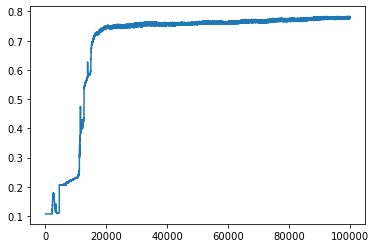

In [121]:
plt.plot(history["accuracis"])

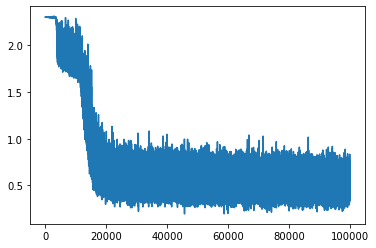

In [122]:
plt.plot(history["costs"])

In [123]:
predictions = ann.predict(X_test_scaled.T)

In [128]:
predictions_categorical = np.argmax(predictions,axis=0)
y_test_oh = one_hot(test_y)
true_categorical = np.argmax(y_test_oh,axis=0)

print(np.sum((predictions_categorical == true_categorical))/y_test_oh.shape[1])

0.7433333333333333


In [127]:
y_test_oh.shape

(10, 600)